In [1]:
import torch
print(torch.__version__)

2.1.0+cu121


In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

#固定随机化种子
torch.manual_seed(1)      
np.random.seed(1)

LR_G = 0.0001
LR_D = 0.0001
BATCH_SIZE = 64
N_IDEAS = 5           #可以理解为Generator的输出

ART_COMPONETS = 15    
PAINT_POINTS = np.vstack([np.linspace(-1,1,ART_COMPONETS) for _ in range(BATCH_SIZE)])

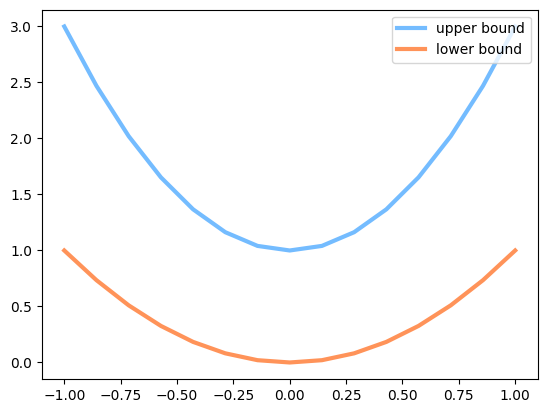

In [4]:
plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')    #2 * x^2 + 1
plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')    #   x^2
plt.legend(loc='upper right')           #标签位置
plt.show()

In [5]:
def artist_work():
    a=np.random.uniform(1,2,size=BATCH_SIZE)[:,np.newaxis]
    paints = a * np.power(PAINT_POINTS,2) + (a-1)
    paints = torch.from_numpy(paints).float()
    return paints


G = nn.Sequential(
    nn.Linear(N_IDEAS,128),
    nn.ReLU(),
    nn.Linear(128,ART_COMPONETS)
)
D = nn.Sequential(
    nn.Linear(ART_COMPONETS,128),
    nn.ReLU(),
    nn.Linear(128,1),
    nn.Sigmoid()            #因为对于D的评估应该是在【0-1】之间的数值，所以这里采用的是Sigmod激活
)
optimizer_G = torch.optim.Adam(G.parameters(),lr=LR_G)
optimizer_D = torch.optim.Adam(D.parameters(),lr=LR_D)




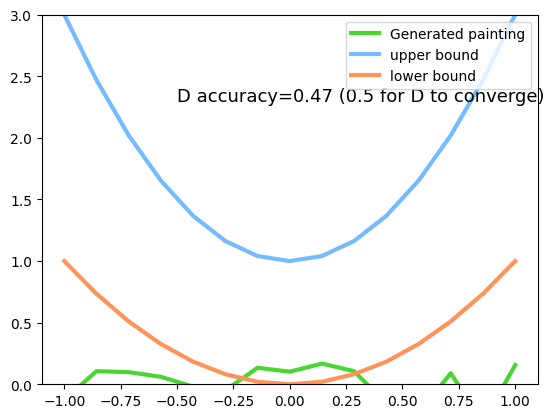

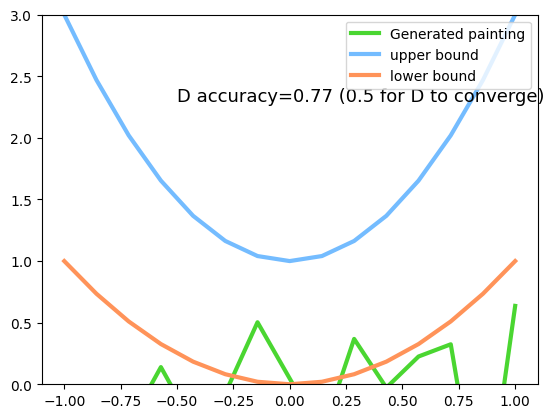

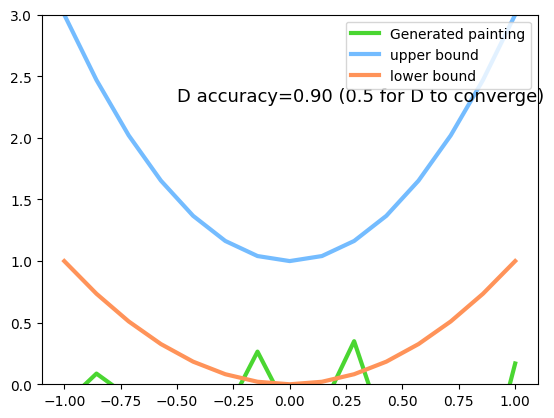

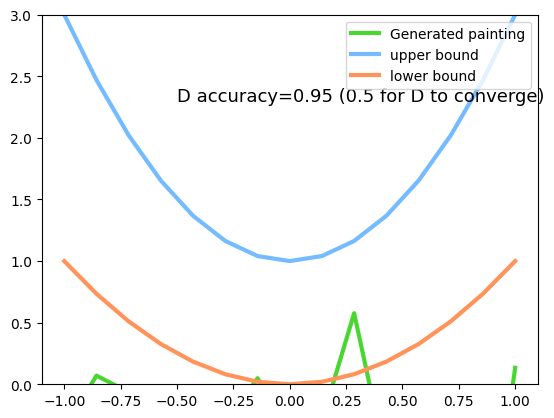

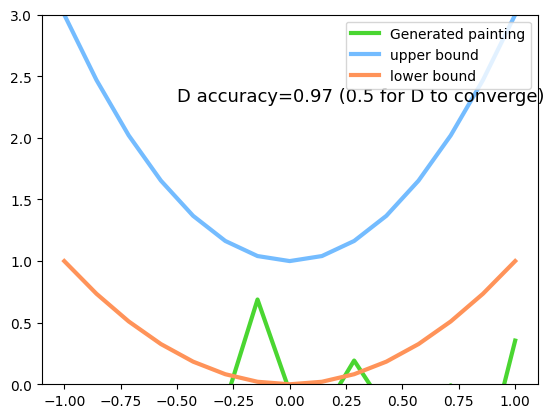

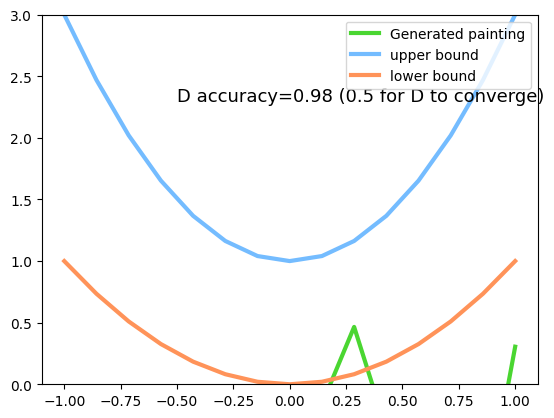

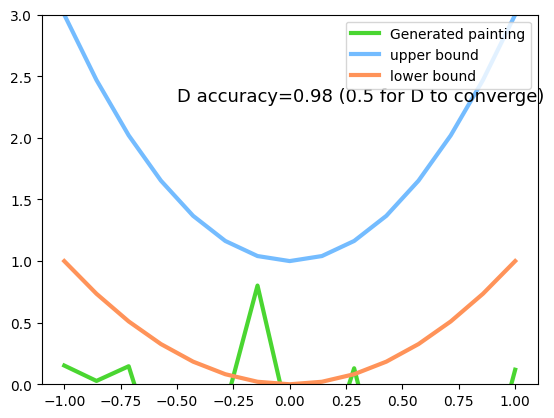

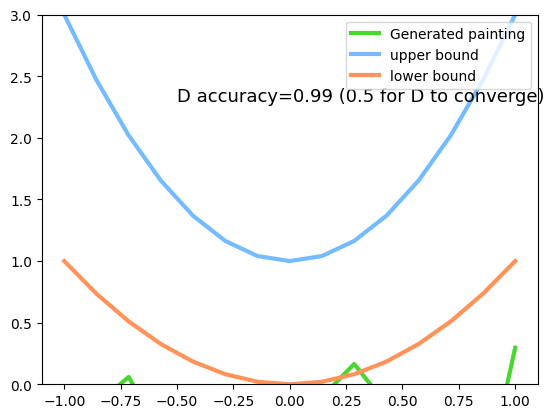

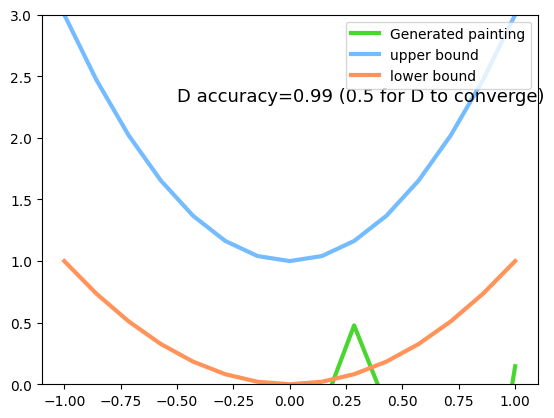

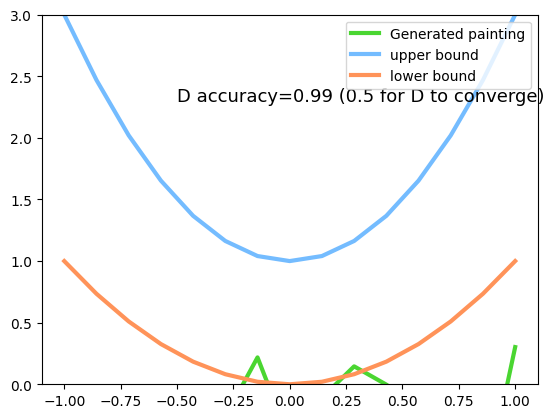

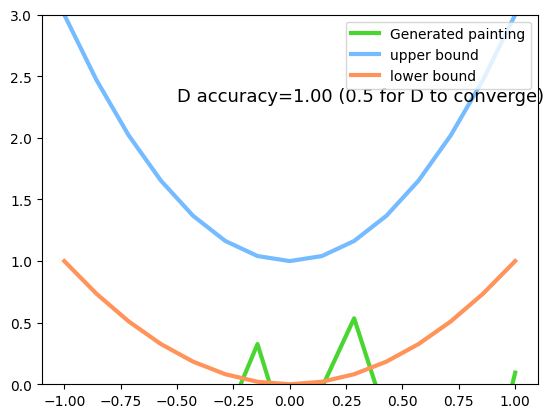

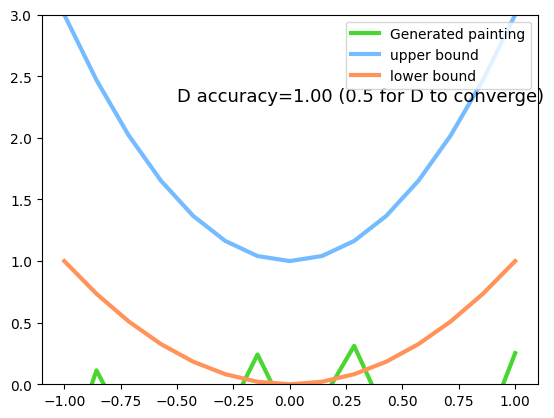

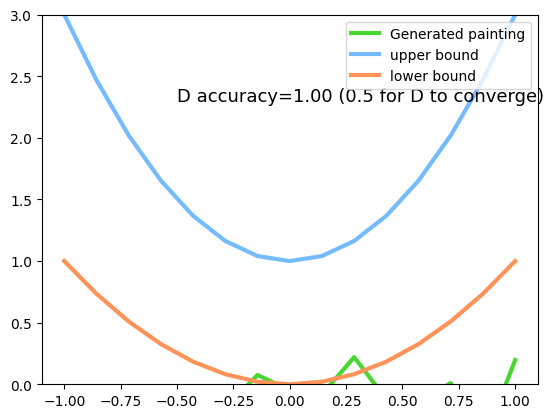

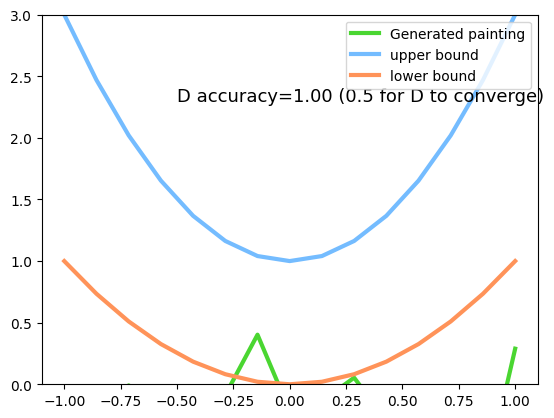

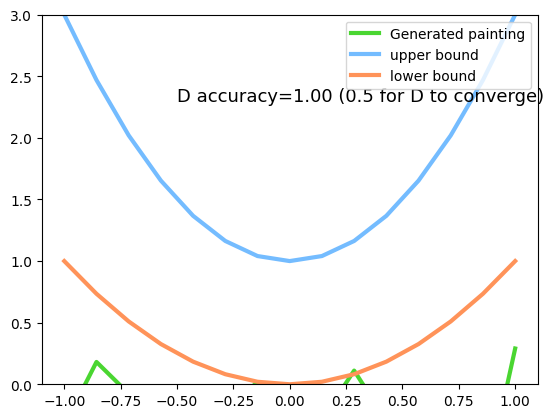

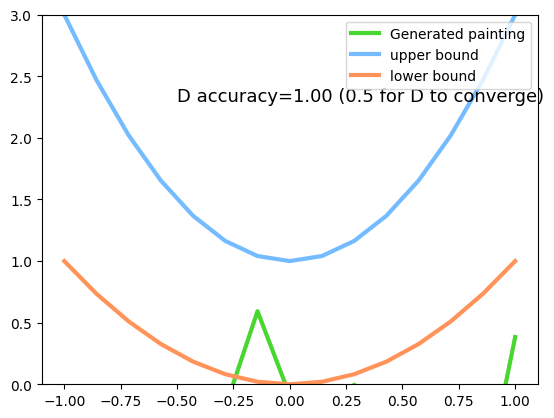

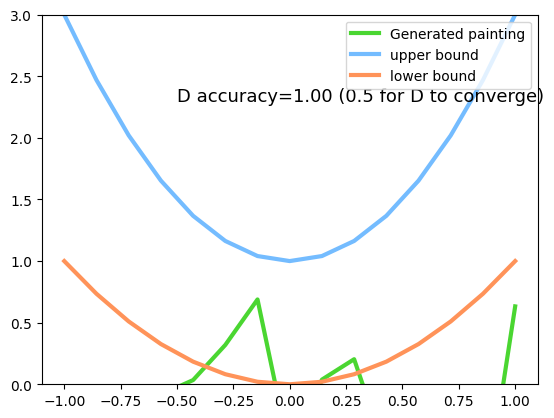

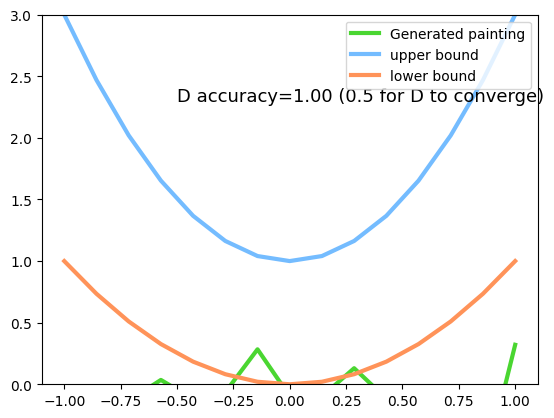

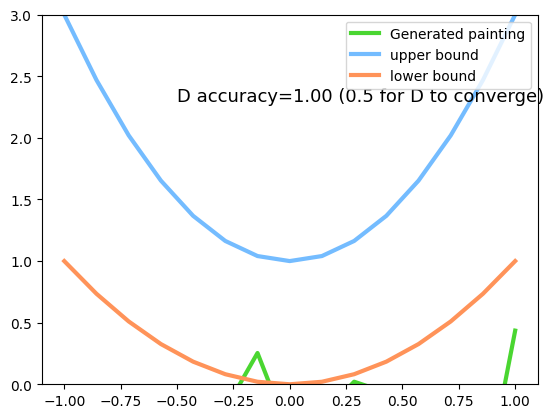

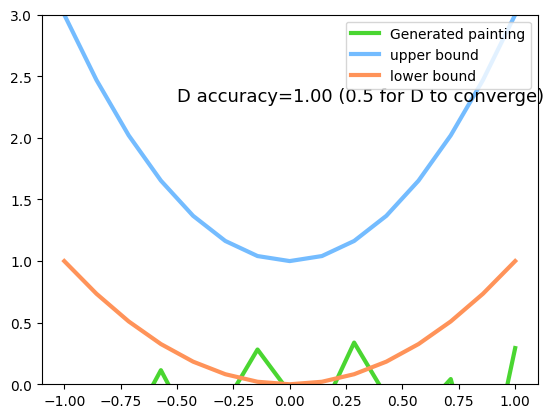

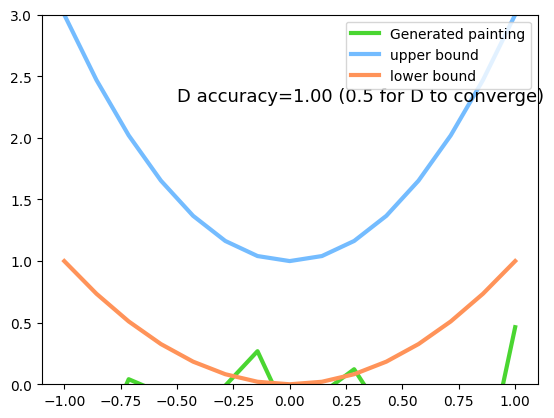

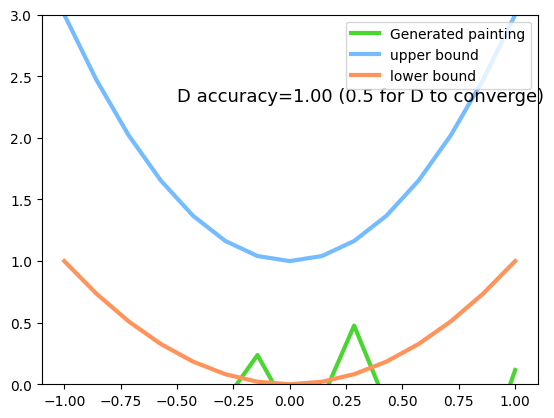

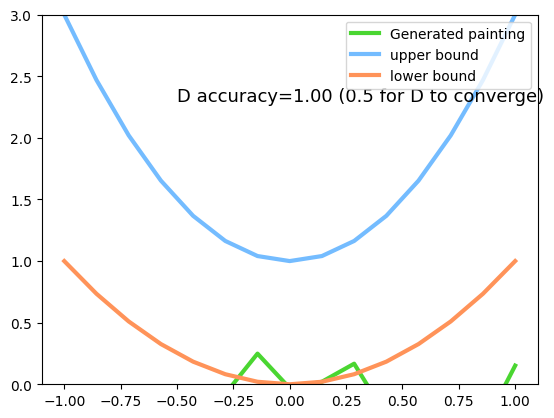

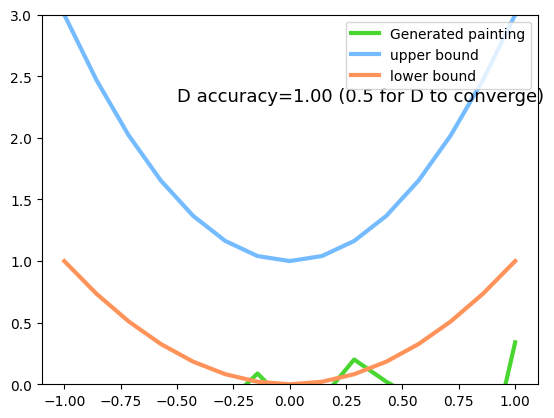

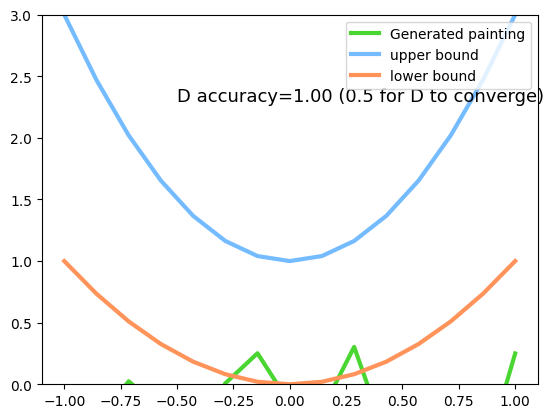

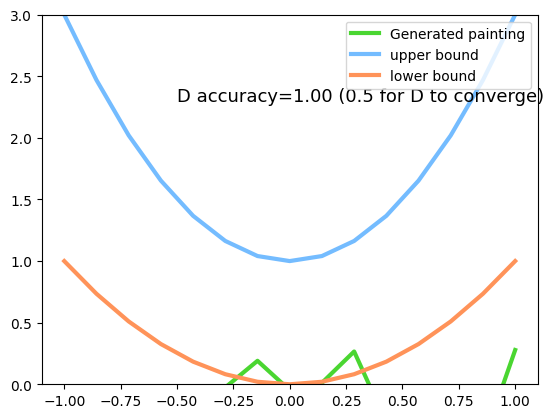

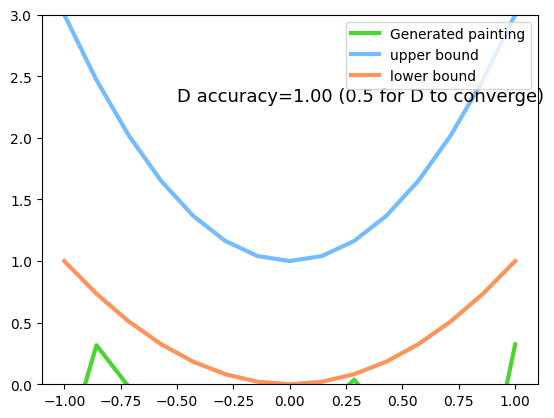

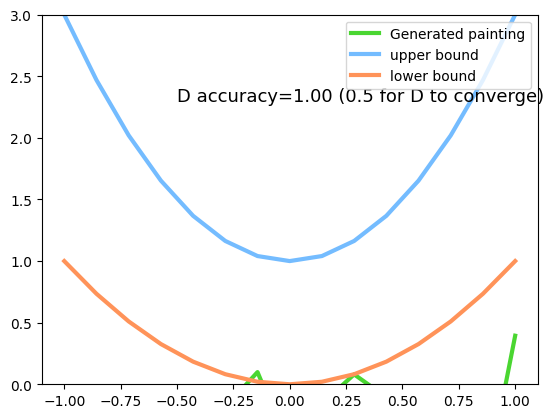

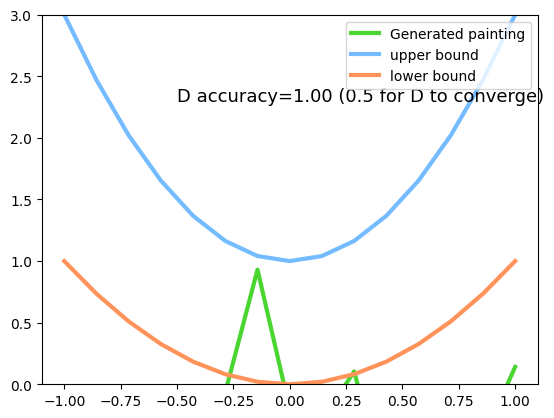

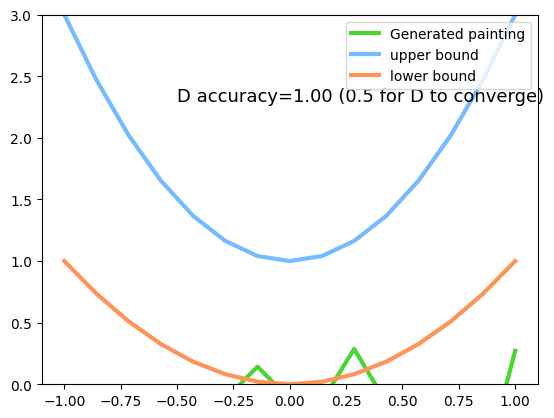

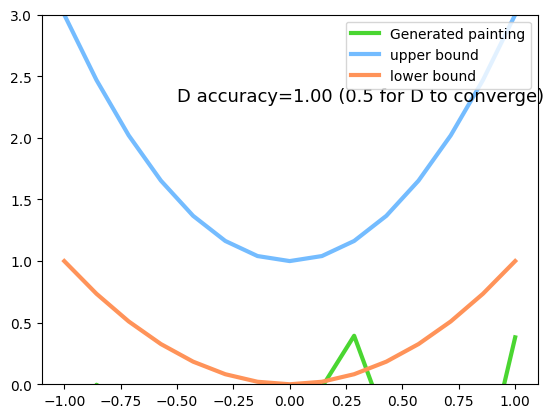

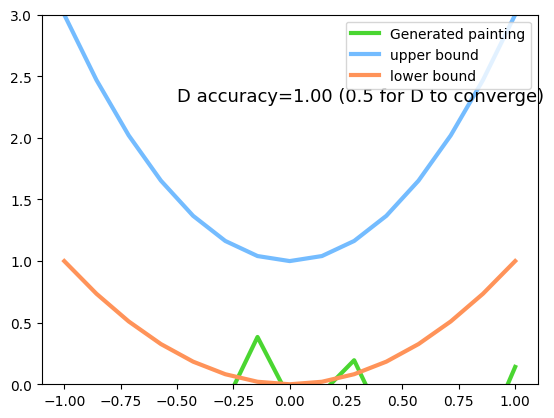

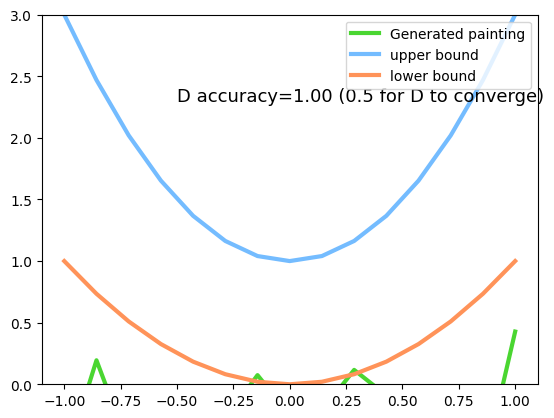

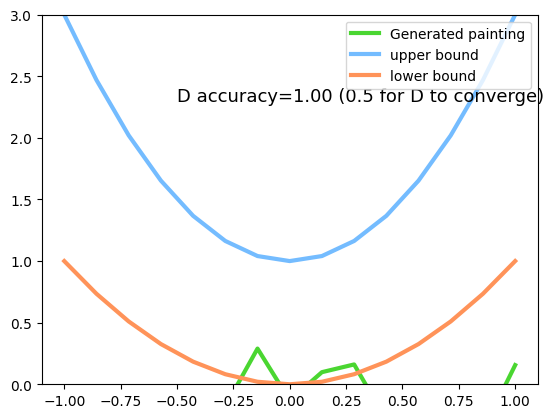

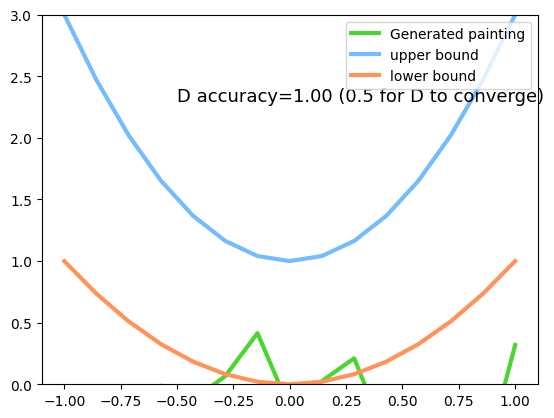

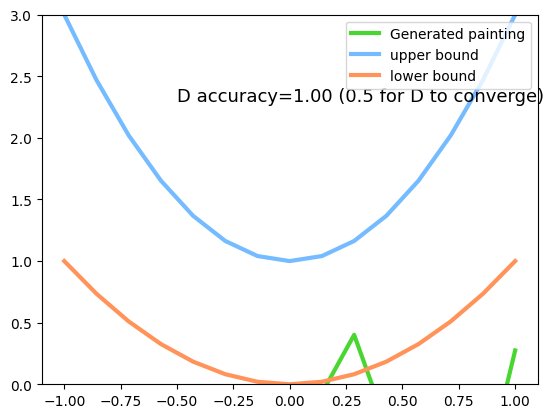

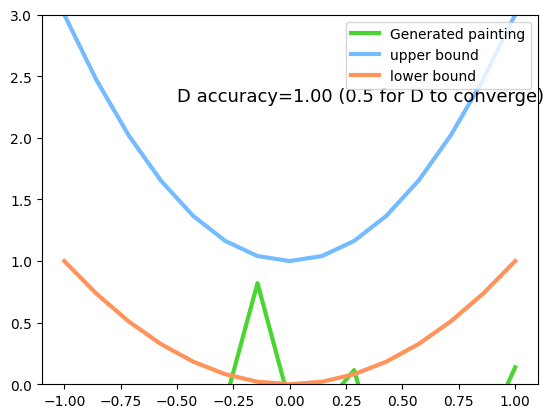

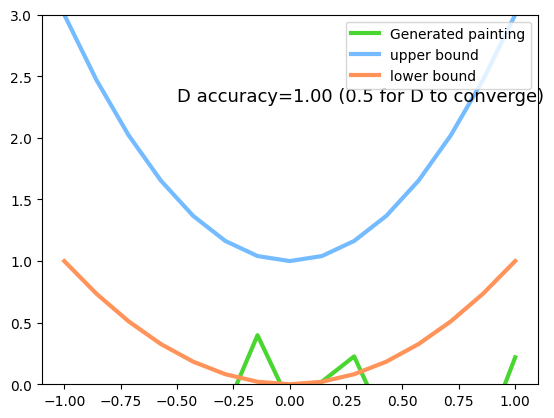

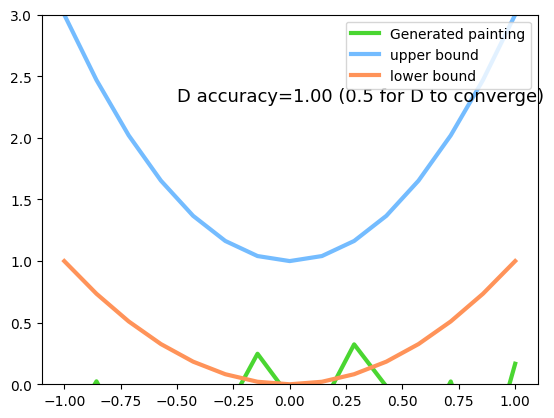

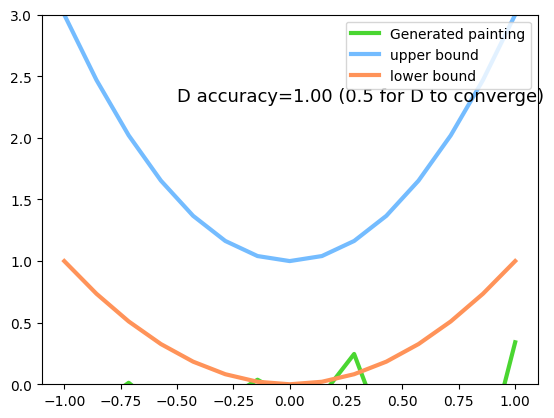

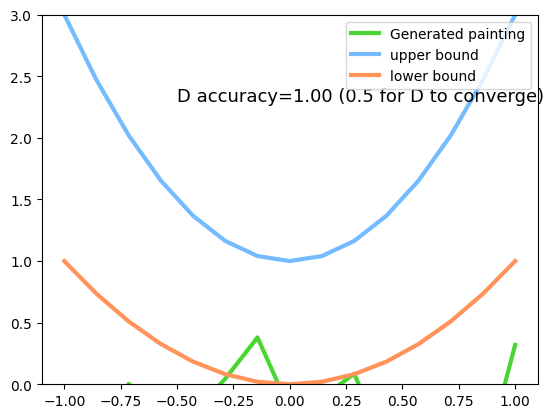

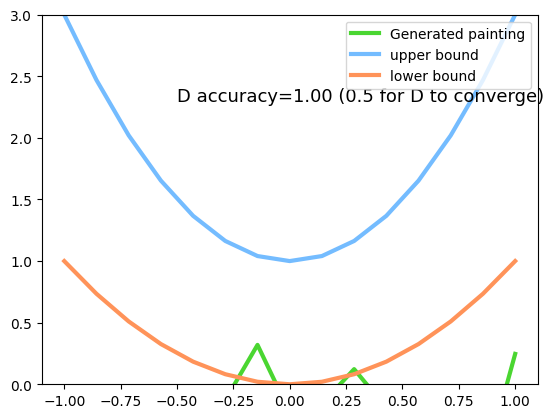

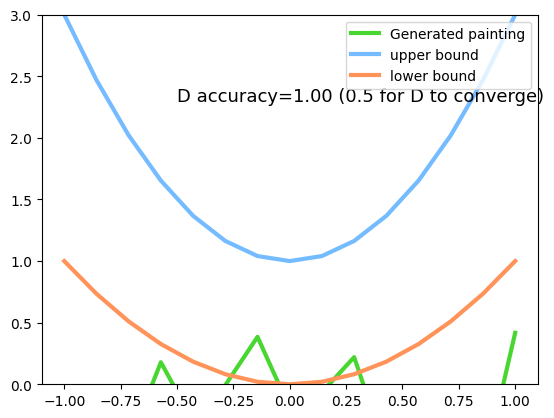

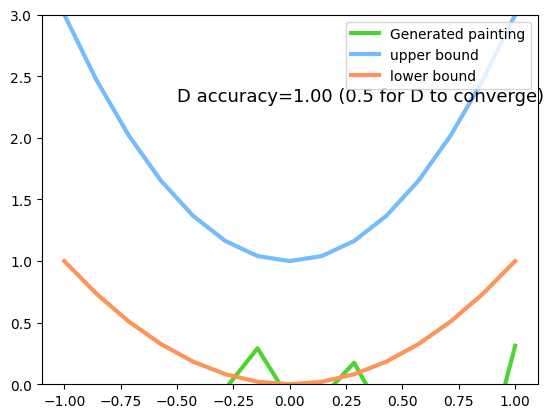

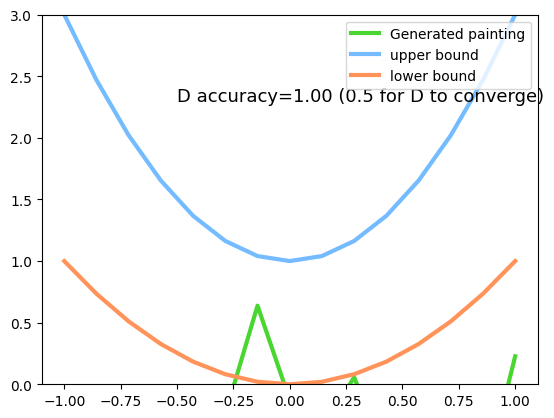

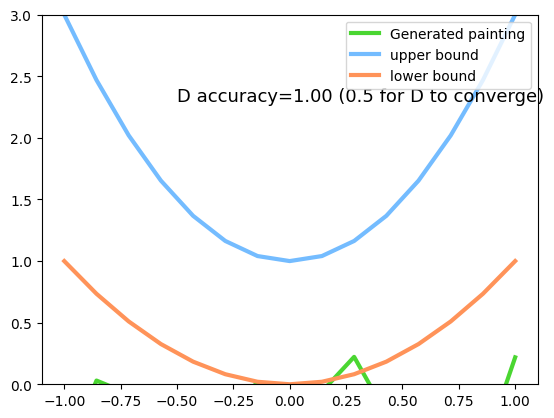

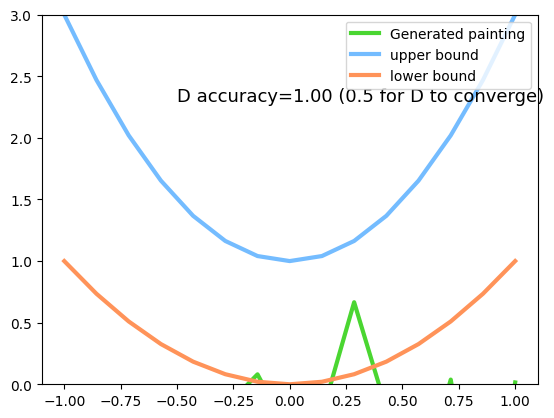

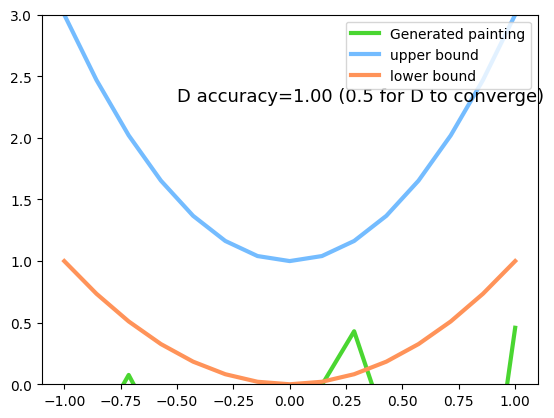

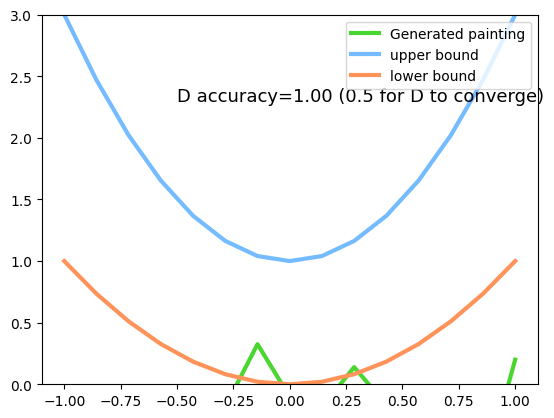

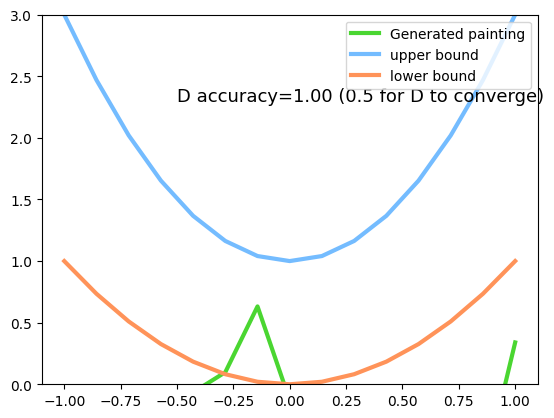

In [8]:

with torch.autograd.set_detect_anomaly(True):
    for step in range(10000):
        artist_painting = artist_work()
        G_idea = torch.randn(BATCH_SIZE,N_IDEAS)
    
        G_paintings = G(G_idea)
    
        pro_atrist0 = D(artist_painting)
        pro_atrist1 = D(G_paintings)
    
        G_loss = -1/torch.mean(torch.log(1.-pro_atrist1))
        D_loss = -torch.mean(torch.log(pro_atrist0)+torch.log(1-pro_atrist1))
    
        optimizer_G.zero_grad()
        optimizer_D.zero_grad()
        D_loss.backward(retain_graph=True)
        G_loss.backward()
        optimizer_D.step()
        optimizer_G.step()
            
        if step % 200 == 0:  # plotting
                plt.cla()
                plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
                plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
                plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
                plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % pro_atrist0.data.numpy().mean(), fontdict={'size': 13})
                # plt.text(-.5, 2, 'G_loss= %.2f ' % G_loss.data.numpy(), fontdict={'size': 13})
        
                plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=10);plt.draw();plt.pause(0.1)


plt.ioff()
plt.show()